In [17]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_probability as tfp

from zoobot.active_learning import acquisition_utils

In [ ]:
## Beta

In [71]:
n_votes = 10
actual_votes = 3  # scalar

concentrations = np.random.rand(5, 2)
individual_dists = [tfp.distributions.BetaBinomial(n_votes, concentration0=concentrations[n, 0], concentration1=concentrations[n, 1]) for n in range(len(concentrations))]

[d.prob(actual_votes) for d in individual_dists]

[<tf.Tensor: shape=(), dtype=float64, numpy=0.02325255233494368>,
 <tf.Tensor: shape=(), dtype=float64, numpy=0.017367584271349715>,
 <tf.Tensor: shape=(), dtype=float64, numpy=0.06598492199680626>,
 <tf.Tensor: shape=(), dtype=float64, numpy=0.04481636225227129>,
 <tf.Tensor: shape=(), dtype=float64, numpy=0.014244972966766196>]

In [72]:
np.mean([d.prob(actual_votes) for d in individual_dists])

0.033133278764427426

In [81]:
mean_concentrations = concentrations.mean(axis=0)
agg_dist = tfp.distributions.BetaBinomial(n_votes, *mean_concentrations)
agg_dist.prob(actual_votes)

<tf.Tensor: shape=(), dtype=float64, numpy=0.029732357823104225>

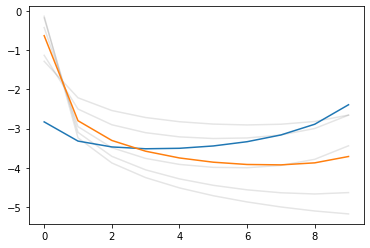

In [105]:
log_probs = []
x = np.arange(0, n_votes)
for d in individual_dists:
    prob = d.log_prob(x)
    plt.plot(x, prob, alpha=.1, color='k')
    log_probs.append(prob)
plt.plot(x, agg_dist.log_prob(x))
plt.plot(x, np.mean(log_probs, axis=0))

In [106]:
from scipy.optimize import least_squares

In [114]:
x = np.arange(0, n_votes)
dist_prob = lambda c: tfp.distributions.BetaBinomial(n_votes, *c).log_prob(x)
dist_prob([0.5, 0.5])

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([-1.7361519, -2.3780062, -2.6085293, -2.7263129, -2.7857363,
       -2.804086 , -2.7857363, -2.7263129, -2.6085298, -2.3780062],
      dtype=float32)>

In [115]:
f0 = lambda c: dist_prob(c) -np.mean(probs, axis=0)

In [121]:
result = least_squares(f0, mean_concentrations)


In [124]:
f0(mean_concentrations)

<tf.Tensor: shape=(10,), dtype=float64, numpy=
array([-2.81098497, -1.95201648, -1.83808084, -1.74315074, -1.64288504,
       -1.52820032, -1.38999025, -1.21347885, -0.9670899 , -0.55483414])>

In [123]:
f0(result.x)

<tf.Tensor: shape=(10,), dtype=float64, numpy=
array([-1.69971206, -0.71292235, -0.6192475 , -0.59126195, -0.59085089,
       -0.60912237, -0.64483176, -0.7015337 , -0.79017742, -0.94406764])>

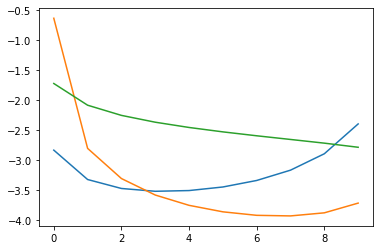

In [122]:
log_probs = []
x = np.arange(0, n_votes)
for d in individual_dists:
    prob = d.log_prob(x)
#     plt.plot(x, prob, alpha=.1, color='k')
    log_probs.append(prob)
plt.plot(x, agg_dist.log_prob(x))
plt.plot(x, np.mean(log_probs, axis=0))
plt.plot(x, tfp.distributions.BetaBinomial(n_votes, *result.x).log_prob(x))

In [87]:
result.x

array([0.59984233, 1.06891808])

In [ ]:
## Dirichlet

In [10]:
concentrations = np.random.rand(5, 3)

In [45]:
n_votes = 5

In [46]:
individual_dists = [tfp.distributions.DirichletMultinomial(n_votes, concentrations[n]) for n in range(len(concentrations))]

In [47]:
individual_dists

[<tfp.distributions.DirichletMultinomial 'DirichletMultinomial' batch_shape=[] event_shape=[3] dtype=float64>,
 <tfp.distributions.DirichletMultinomial 'DirichletMultinomial' batch_shape=[] event_shape=[3] dtype=float64>,
 <tfp.distributions.DirichletMultinomial 'DirichletMultinomial' batch_shape=[] event_shape=[3] dtype=float64>,
 <tfp.distributions.DirichletMultinomial 'DirichletMultinomial' batch_shape=[] event_shape=[3] dtype=float64>,
 <tfp.distributions.DirichletMultinomial 'DirichletMultinomial' batch_shape=[] event_shape=[3] dtype=float64>]

In [54]:
actual_votes = [1, 2, 2]

In [55]:
[d.prob(actual_votes) for d in individual_dists]

[<tf.Tensor: shape=(), dtype=float64, numpy=0.008757700983285875>,
 <tf.Tensor: shape=(), dtype=float64, numpy=0.004213899825972968>,
 <tf.Tensor: shape=(), dtype=float64, numpy=0.011469274593985751>,
 <tf.Tensor: shape=(), dtype=float64, numpy=0.014853418302021953>,
 <tf.Tensor: shape=(), dtype=float64, numpy=0.00710146950483513>]

In [56]:
mean_concentrations = concentrations.mean(axis=0)
agg_dist = tfp.distributions.DirichletMultinomial(n_votes, mean_concentrations)
agg_dist.prob(actual_votes)

<tf.Tensor: shape=(), dtype=float64, numpy=0.015485661635243314>

In [57]:
concentrations_batch = np.expand_dims(concentrations, axis=0).astype(np.float32).transpose(0, 2, 1)
concentrations_batch.shape

(1, 3, 5)

In [58]:
mixture = acquisition_utils.dirichlet_mixture(concentrations_batch, n_votes, n_samples=5)
mixture

<tfp.distributions.MixtureSameFamily 'MixtureSameFamily' batch_shape=[1] event_shape=[3] dtype=float32>

In [59]:
mixture.prob(np.expand_dims(actual_votes, axis=0))

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.00927915], dtype=float32)>